# 축구 데이터 
202055126박성혁 202055127 박세영

# 사용한 데이터
1. 2019_whole_season_data.csv 19-20시즌 프리미어리그 선수 데이터
2. fifa21 raw data v2.csv 피파21 데이터 
3. FIFA21_official_data.csv 피파21 데이터

# 질문 및 가설 
 
1. 손흥민이 프리미어리그에서 어느 정도에 위치할까?
2. 실제 선수들의 활약상과 게임 속 스탯의 상관관계
3. FIFA 포지션 별 주급(Wage)은 공격수가 가장 높을 것이다. 

In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
from numpy import nan as NA
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")
# 소수점 3자리까지 표시
%precision 3

'%.3f'

# 1. 프리미어리그에서 손흥민의 위치는?

In [2]:
#2019시즌 전시즌 데이터 불러오기
season=pd.read_csv('2019_whole_season_data.csv')
season

id                player_name  games  time  goals_season  xG_season  \
0     755                Jamie Vardy     35  3034            23  18.903537   
1     318  Pierre-Emerick Aubameyang     36  3143            22  16.352623   
2     986                 Danny Ings     38  2836            22  15.659717   
3     618            Raheem Sterling     33  2678            20  19.799906   
4    1250              Mohamed Salah     34  2904            19  20.663319   
..    ...                        ...    ...   ...           ...        ...   
510  8493                Jake Vokins      1    90             0   0.013284   
511  8496                Tommy Doyle      1    13             0   0.077601   
512  8518              Jordan Thomas      1     1             0   0.000000   
513  8562                Luke Thomas      3   270             0   0.000000   
514  8563               George Hirst      2     5             0   0.100603   

     assists_season  xA_season  shots_season  key_passes_season  yellow_cards  \
0                 5   6.368298            89                 32             3   
1                 3   4.492487            93                 26             3   
2                 2   2.849085            93                 35             3   
3                 1   7.208586           100                 48             5   
4                10   8.726043           132                 60             1   
..              ...        ...           ...                ...           ...   
510               0   0.096596             1                  1             0   
511               0   0.000000             1                  0             0   
512               0   0.000000             0                  0             0   
513               1   0.629982             0                  9             0   
514               0   0.000000             3                  0             0   

     red_cards position       team_title  npg_season  npxG_season    xGChain  \
0            0      F S        Leicester          19    15.097693  21.026607   
1            1    F M S          Arsenal          20    14.830359  19.964282   
2            0    F M S      Southampton          21    14.137379  18.488031   
3            0    F M S  Manchester City          20    18.277569  31.442010   
4            0      F S        Liverpool          16    18.379812  31.374198   
..         ...      ...              ...         ...          ...        ...   
510          0        D      Southampton           0     0.013284   0.501861   
511          0        S  Manchester City           0     0.077601   0.077601   
512          0        S          Norwich           0     0.000000   0.000000   
513          0        M        Leicester           0     0.000000   1.378853   
514          0        S        Leicester           0     0.100603   0.021223   

     xGBuildup  
0     1.724341  
1     5.339657  
2     5.015938  
3    10.185997  
4     8.425027  
..         ...  
510   0.488577  
511   0.000000  
512   0.000000  
513   1.267736  
514   0.000000  

[515 rows x 18 columns]

In [3]:
# 출전시간 1000분 넘는 선수들
df1=season[['player_name','time','goals_season','shots_season','assists_season','key_passes_season']]
over_1000=df1[df1.time >= 1000]
over_1000

player_name  time  goals_season  shots_season  \
0                  Jamie Vardy  3034            23            89   
1    Pierre-Emerick Aubameyang  3143            22            93   
2                   Danny Ings  2836            22            93   
3              Raheem Sterling  2678            20           100   
4                Mohamed Salah  2904            19           132   
..                         ...   ...           ...           ...   
471                Jack Stacey  1553             0             5   
473       Christoph Zimmermann  1424             0             6   
474              Steven Alzate  1175             0            13   
477          Marvelous Nakamba  1836             0             7   
482                Reece James  1512             0            18   

     assists_season  key_passes_season  
0                 5                 32  
1                 3                 26  
2                 2                 35  
3                 1                 48  
4                10                 60  
..              ...                ...  
471               2                 10  
473               1                  2  
474               0                 14  
477               0                 12  
482               2                 25  

[309 rows x 6 columns]

In [4]:
# 프리미어리그 19/20 시즌 손흥민 선수의 기록
son19 = df1.query('player_name == "Son Heung-Min"')
son19

player_name  time  goals_season  shots_season  assists_season  \
17  Son Heung-Min  2511            11            81              10   

    key_passes_season  
17                 41

In [5]:
#프리미어 리그 속 전체 선수들의 슛을 때린 횟수와 골을 넣은 횟수의 상관관계
sns.regplot(data = over_1000, x = 'shots_season', y = 'goals_season', scatter_kws = {'s':15})

용어정리
1. 키패스(key pass) : 유효 슈팅으로 연결되는 패스 -shots season
2. 도움(assist) : 골로 연결되는 패스 - goal season

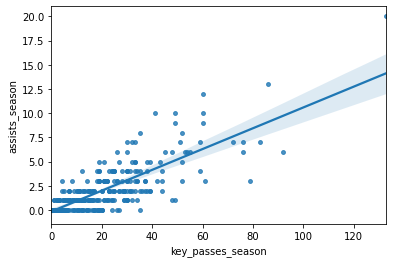

In [6]:
sns.regplot(data = over_1000, x = 'key_passes_season', y = 'assists_season',scatter_kws = {'s':15})

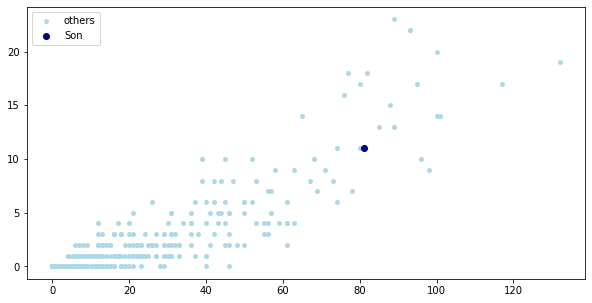

In [7]:
# 위의 그래프에서 슛과 골의 선형성을 보았기 때문에 이번엔 프리미어리그 내 손흥민 선수의 위치를 알아본다.
#아래는 슛,골 같이 봤을 때
plt.figure(figsize=(10,5))
plt.scatter(over_1000.shots_season, over_1000.goals_season, color='lightblue',s=15) # x축: 슛 횟수, y축: 골 횟수
plt.scatter(son19.shots_season,son19.goals_season,color='darkblue')
plt.legend(('others','Son'),loc='upper left')

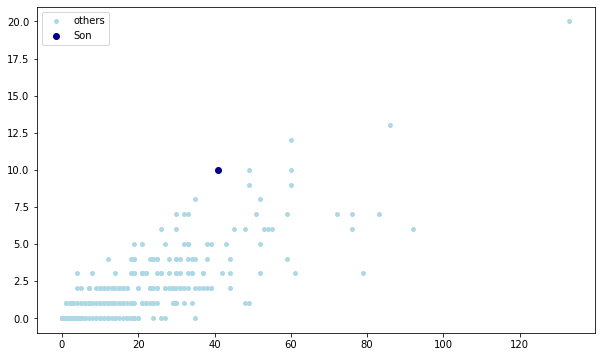

In [8]:
#프리미어 리그 내 키패스와 어시스트 같이 봤을 때
plt.figure(figsize=(10,6))
plt.scatter(over_1000.key_passes_season, over_1000.assists_season, color='lightblue',s=15) # x축: 키패스 횟수 y축: 어시스트 횟수
plt.scatter(son19.key_passes_season,son19.assists_season,color='darkblue')
plt.legend(('others','Son'),loc='upper left')

In [9]:
# 토트넘에서 1000분 이상 뛴 선수들
tot = season.query('team_title == "Tottenham"')
tot_1000=tot[tot.time >= 1000]

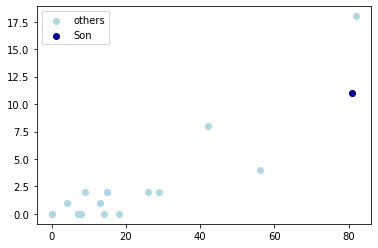

In [10]:
# 토트넘에서 손흥민 골 의존도
plt.scatter(tot_1000.shots_season, tot_1000.goals_season, color='lightblue')
plt.scatter(son19.shots_season,son19.goals_season,color='darkblue')
plt.legend(('others','Son'))

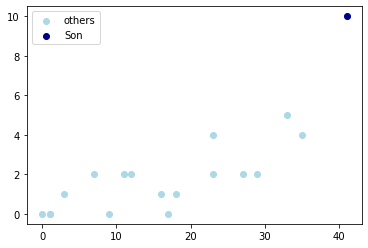

In [11]:
# 토트넘에서 손흥민 어시스트 의존도
plt.scatter(tot_1000.key_passes_season, tot_1000.assists_season, color='lightblue')
plt.scatter(son19.key_passes_season,son19.assists_season,color='darkblue')
plt.legend(('others','Son'))

# 결론
1. 프리미어리그에서 손흥민의 슈팅횟수와 골의 횟수는 중상권에 위치하고 있음을 알 수 있다.
2. 토트넘에서의 손흥민의 골 의존도는 2번째로 높으며, 어시스트 의존도는 첫번째로 높다.

# 2. 프리미어리그에서의 실제 선수들의 활약상과 FIFA21 게임 속 스탯의 상관관계

1. 패스 능력 스탯
2. Finishing (골 결정력) : 축구, 농구 따위에서, 득점할 수 있는 기회가 왔을 때 실수하지 않고 득점할 수 있는 능력 

In [12]:
#fifa raw data 불러오기
fifa_21=pd.read_csv('fifa21 raw data v2.csv')
fifa_21

ID               Name                      LongName  \
0      158023           L. Messi                  Lionel Messi   
1       20801  Cristiano Ronaldo  C. Ronaldo dos Santos Aveiro   
2      200389           J. Oblak                     Jan Oblak   
3      192985       K. De Bruyne               Kevin De Bruyne   
4      190871          Neymar Jr    Neymar da Silva Santos Jr.   
...       ...                ...                           ...   
18974  247223             Xia Ao                        Ao Xia   
18975  258760           B. Hough                     Ben Hough   
18976  252757        R. McKinley                Ronan McKinley   
18977  243790       Wang Zhen'ao                  Zhen'ao Wang   
18978  252520          Zhou Xiao                     Xiao Zhou   

                                               photoUrl  \
0      https://cdn.sofifa.com/players/158/023/21_60.png   
1      https://cdn.sofifa.com/players/020/801/21_60.png   
2      https://cdn.sofifa.com/players/200/389/21_60.png   
3      https://cdn.sofifa.com/players/192/985/21_60.png   
4      https://cdn.sofifa.com/players/190/871/21_60.png   
...                                                 ...   
18974  https://cdn.sofifa.com/players/247/223/21_60.png   
18975  https://cdn.sofifa.com/players/258/760/21_60.png   
18976  https://cdn.sofifa.com/players/252/757/21_60.png   
18977  https://cdn.sofifa.com/players/243/790/21_60.png   
18978  https://cdn.sofifa.com/players/252/520/21_60.png   

                                               playerUrl Nationality  Age  \
0      http://sofifa.com/player/158023/lionel-messi/2...   Argentina   33   
1      http://sofifa.com/player/20801/c-ronaldo-dos-s...    Portugal   35   
2      http://sofifa.com/player/200389/jan-oblak/210006/    Slovenia   27   
3      http://sofifa.com/player/192985/kevin-de-bruyn...     Belgium   29   
4      http://sofifa.com/player/190871/neymar-da-silv...      Brazil   28   
...                                                  ...         ...  ...   
18974     http://sofifa.com/player/247223/ao-xia/210006/    China PR   21   
18975  http://sofifa.com/player/258760/ben-hough/210006/     England   17   
18976  http://sofifa.com/player/252757/ronan-mckinley...     England   18   
18977  http://sofifa.com/player/243790/zhenao-wang/21...    China PR   20   
18978  http://sofifa.com/player/252520/xiao-zhou/210006/    China PR   21   

       ↓OVA  POT                         Club  ...     A/W     D/W   IR PAC  \
0        93   93         \n\n\n\nFC Barcelona  ...  Medium     Low  5 ★  85   
1        92   92             \n\n\n\nJuventus  ...    High     Low  5 ★  89   
2        91   93      \n\n\n\nAtlético Madrid  ...  Medium  Medium  3 ★  87   
3        91   91      \n\n\n\nManchester City  ...    High    High  4 ★  76   
4        91   91  \n\n\n\nParis Saint-Germain  ...    High  Medium  5 ★  91   
...     ...  ...                          ...  ...     ...     ...  ...  ..   
18974    47   55           \n\n\n\nWuhan Zall  ...  Medium  Medium  1 ★  64   
18975    47   67      \n\n\n\nOldham Athletic  ...  Medium  Medium  1 ★  64   
18976    47   65           \n\n\n\nDerry City  ...  Medium  Medium  1 ★  63   
18977    47   57     \n\n\n\nDalian YiFang FC  ...  Medium  Medium  1 ★  58   
18978    47   57     \n\n\n\nDalian YiFang FC  ...  Medium  Medium  1 ★  62   

      SHO  PAS DRI DEF PHY Hits  
0      92   91  95  38  65  771  
1      93   81  89  35  77  562  
2      92   78  90  52  90  150  
3      86   93  88  64  78  207  
4      85   86  94  36  59  595  
...    ..  ...  ..  ..  ..  ...  
18974  28   26  38  48  51  NaN  
18975  40   48  49  35  45  NaN  
18976  39   44  46  40  53  NaN  
18977  49   41  49  30  44  NaN  
18978  22   39  42  45  55  NaN  

[18979 rows x 77 columns]

In [13]:
fifa_21['player_name']=fifa_21.LongName #LongName의 열을 player_name으로 추가

In [14]:
# 프리미어리그 데이터와 피파21 raw 데이터를 inner join = 피파 21에서 프리미어리그 선수만 뽑아내기
df2=pd.merge(season[['player_name','time','goals_season','shots_season','assists_season','key_passes_season']],
             fifa_21[['player_name','Finishing','PAS','Crossing','Short Passing','Long Passing']],on='player_name')
df2

player_name  time  goals_season  shots_season  \
0                  Jamie Vardy  3034            23            89   
1    Pierre-Emerick Aubameyang  3143            22            93   
2                   Danny Ings  2836            22            93   
3              Raheem Sterling  2678            20           100   
4                Mohamed Salah  2904            19           132   
..                         ...   ...           ...           ...   
392                Tommy Doyle    13             0             1   
393              Jordan Thomas     1             0             0   
394                Luke Thomas   270             0             0   
395                Luke Thomas   270             0             0   
396               George Hirst     5             0             3   

     assists_season  key_passes_season  Finishing  PAS  Crossing  \
0                 5                 32         92   66        68   
1                 3                 26         91   75        76   
2                 2                 35         85   67        64   
3                 1                 48         85   79        78   
4                10                 60         91   81        79   
..              ...                ...        ...  ...       ...   
392               0                  0         41   62        51   
393               0                  0         36   46        49   
394               1                  9         53   60        64   
395               1                  9         36   50        58   
396               0                  0         68   41        29   

     Short Passing  Long Passing  
0               69            48  
1               77            64  
2               74            61  
3               84            69  
4               84            75  
..             ...           ...  
392             69            64  
393             47            46  
394             60            49  
395             51            38  
396             54            31  

[397 rows x 11 columns]

In [15]:
# FIFA21게임 내에서의 총 패스 능력치 열 추가(출전시간 1000분 이상)
df2['total_passing']=(df2.PAS+df2.Crossing+df2['Short Passing']+df2['Long Passing'])/4
pass_corr=df2[(df2.time >= 1000)]
pass_corr

player_name  time  goals_season  shots_season  \
0                  Jamie Vardy  3034            23            89   
1    Pierre-Emerick Aubameyang  3143            22            93   
2                   Danny Ings  2836            22            93   
3              Raheem Sterling  2678            20           100   
4                Mohamed Salah  2904            19           132   
..                         ...   ...           ...           ...   
361       Christoph Zimmermann  1424             0             6   
362              Steven Alzate  1175             0            13   
365          Marvelous Nakamba  1836             0             7   
368                Reece James  1512             0            18   
369                Reece James  1512             0            18   

     assists_season  key_passes_season  Finishing  PAS  Crossing  \
0                 5                 32         92   66        68   
1                 3                 26         91   75        76   
2                 2                 35         85   67        64   
3                 1                 48         85   79        78   
4                10                 60         91   81        79   
..              ...                ...        ...  ...       ...   
361               1                  2         25   39        20   
362               0                 14         57   66        65   
365               0                 12         36   63        46   
368               2                 25         48   72        81   
369               2                 25         41   58        65   

     Short Passing  Long Passing  total_passing  
0               69            48          62.75  
1               77            64          73.00  
2               74            61          66.50  
3               84            69          77.50  
4               84            75          79.75  
..             ...           ...            ...  
361             54            61          43.50  
362             73            67          67.75  
365             73            72          63.50  
368             73            68          73.50  
369             65            58          61.50  

[241 rows x 12 columns]

[0.5712996747811795, 2.7997096581424757e-22]
[0.6300037554678518, 4.638360747483056e-28]


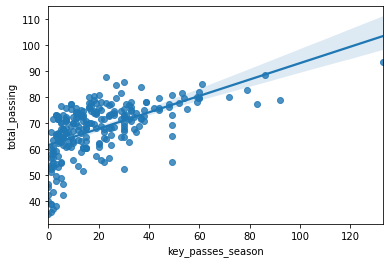

In [16]:
# 실제 키패스(골로 연결되는 패스) 횟수가 많은 선수는 FIFA21 내에서의 총 패스 능력치도 높은가 계산
sns.regplot(data = pass_corr, x = 'key_passes_season', y ='total_passing' )
[R1, p1] = stats.pearsonr(pass_corr.key_passes_season,pass_corr.total_passing)
print([R1, p1])
#spearmanr은 직선관계X, 순위가 비슷하게 가는지 매기는 것 , 아웃라이어 제외
[R2, p2] = stats.spearmanr(pass_corr.key_passes_season,pass_corr.total_passing)
print([R2, p2])

분석: 실제 선수들의 키패스 능력이 높을수록 게임내의 총 패스능력이 올라가는 양의 상관관계가 약 0.571이고, 낮은 p-value를 보인다.

In [17]:
#슛을 30번 이상 차보았고(슈팅 한번에 골 한번이면 결정력이 100이 되는 경우 제외)
#뛴 시간이 1000분 이상인 선수들의 데이터를 정의
fin_corr=df2[(df2.shots_season >= 30)&(df2.time>=1000)] 
fin_corr

player_name  time  goals_season  shots_season  \
0                  Jamie Vardy  3034            23            89   
1    Pierre-Emerick Aubameyang  3143            22            93   
2                   Danny Ings  2836            22            93   
3              Raheem Sterling  2678            20           100   
4                Mohamed Salah  2904            19           132   
..                         ...   ...           ...           ...   
174           Emiliano Buendía  2462             1            40   
179                Declan Rice  3420             1            31   
181             Philip Billing  2542             1            33   
201               Kenny McLean  2955             1            30   
217      Pierre-Emile Højbjerg  2740             0            46   

     assists_season  key_passes_season  Finishing  PAS  Crossing  \
0                 5                 32         92   66        68   
1                 3                 26         91   75        76   
2                 2                 35         85   67        64   
3                 1                 48         85   79        78   
4                10                 60         91   81        79   
..              ...                ...        ...  ...       ...   
174               7                 83         69   78        76   
179               3                 22         31   65        39   
181               1                 15         64   71        60   
201               1                 24         66   70        54   
217               1                 30         63   76        66   

     Short Passing  Long Passing  total_passing  
0               69            48          62.75  
1               77            64          73.00  
2               74            61          66.50  
3               84            69          77.50  
4               84            75          79.75  
..             ...           ...            ...  
174             80            76          77.50  
179             79            74          64.25  
181             76            77          71.00  
201             76            73          68.25  
217             81            79          75.50  

[81 rows x 12 columns]

In [18]:
#총 슈팅한 횟수 중 골이 들어간 횟수의 백분율( Goals per Shots)
df2['GpS']=(df2.goals_season/df2.shots_season)*100
fin_corr=df2[(df2.shots_season > 30)&(df2.time>1000)]
fin_corr

player_name  time  goals_season  shots_season  \
0                  Jamie Vardy  3034            23            89   
1    Pierre-Emerick Aubameyang  3143            22            93   
2                   Danny Ings  2836            22            93   
3              Raheem Sterling  2678            20           100   
4                Mohamed Salah  2904            19           132   
..                         ...   ...           ...           ...   
169              Harry Maguire  3420             1            31   
174           Emiliano Buendía  2462             1            40   
179                Declan Rice  3420             1            31   
181             Philip Billing  2542             1            33   
217      Pierre-Emile Højbjerg  2740             0            46   

     assists_season  key_passes_season  Finishing  PAS  Crossing  \
0                 5                 32         92   66        68   
1                 3                 26         91   75        76   
2                 2                 35         85   67        64   
3                 1                 48         85   79        78   
4                10                 60         91   81        79   
..              ...                ...        ...  ...       ...   
169               0                 16         48   69        51   
174               7                 83         69   78        76   
179               3                 22         31   65        39   
181               1                 15         64   71        60   
217               1                 30         63   76        66   

     Short Passing  Long Passing  total_passing        GpS  
0               69            48          62.75  25.842697  
1               77            64          73.00  23.655914  
2               74            61          66.50  23.655914  
3               84            69          77.50  20.000000  
4               84            75          79.75  14.393939  
..             ...           ...            ...        ...  
169             78            82          70.00   3.225806  
174             80            76          77.50   2.500000  
179             79            74          64.25   3.225806  
181             76            77          71.00   3.030303  
217             81            79          75.50   0.000000  

[78 rows x 13 columns]

[0.6195849397748063, 1.4676083680977109e-09]
[0.7149035669171475, 1.9564892481132132e-13]


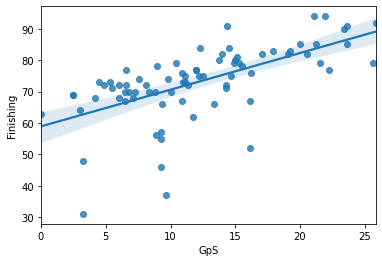

In [19]:
sns.regplot(data = fin_corr, x = 'GpS', y = 'Finishing')
[R1, p1] = stats.pearsonr(fin_corr.GpS,fin_corr.Finishing)
print([R1, p1])
#spearmanr
[R2, p2] = stats.spearmanr(fin_corr.GpS,fin_corr.Finishing)
print([R2, p2])

(실제 선수들이 골을 넣은 횟수)/(실제 선수들의 슈팅횟수)는 유효한 골을 넣을 확률이다.
이는 게임내에서 골 결정력(Finishing)스탯과 0.620의 양의 상관관계가 있으며, 낮은 p값을 보인다.

# 결론
1. 19-20 시즌 프리미어리그에서 실제 선수들의 키패스 횟수가 높을수록 FIFA21의 총 패스 능력치도 높다. 
2. 19-20 시즌 프리미어리그에서 실제 선수들이 골을 넣은 횟수와 슈팅한 횟수 모두 FIFA21 게임의 선수별 골 결정력에 반영이 된다.
3. 슈팅했을 때 골에 들어갈 백분율인 ratio는 FIFA21 게임의 선수별 골 결정력과 양의 상관관계를 이룬다.

# 3. FIFA 게임 포지션 별 주급(Wage)은 공격수(FW)가 가장 높을 것이다.
주의할 점: FIFA 게임 내의 데이터이며, 실제 선수들의 주급과 비교해본 결과 비슷한 선수도 있지만 큰 차이를 보이는 선수들도 존재한다.

In [20]:
data = pd.read_csv('FIFA21_official_data.csv') #csv파일 읽기
data1 = data[['Name','Value','Wage','Best Position','Release Clause','Finishing']] #필요한 열만 추출하여 data1 만들기
data1

Name   Value   Wage Best Position Release Clause  Finishing
0             L. Suárez  €31.5M  €115K            ST         €64.6M       92.0
1          K. De Bruyne    €87M  €370K           CAM          €161M       82.0
2       Bruno Fernandes    €63M  €195K           CAM        €124.4M       77.0
3          A. Griezmann  €50.5M  €290K            ST        €103.5M       88.0
4              M. Acuña    €22M   €41K            LB         €46.2M       66.0
...                 ...     ...    ...           ...            ...        ...
17103      19 C. Miszta    €50K   €500            GK          €120K        5.0
17104           B. Voll    €50K   €500            GK           €83K        9.0
17105         T. Parker    €60K   €500            GK          €149K        7.0
17106        H. Sveijer    €50K   €500            GK           €94K        7.0
17107       19 J. Milli    €50K   €500            GK          €109K        6.0

[17108 rows x 6 columns]

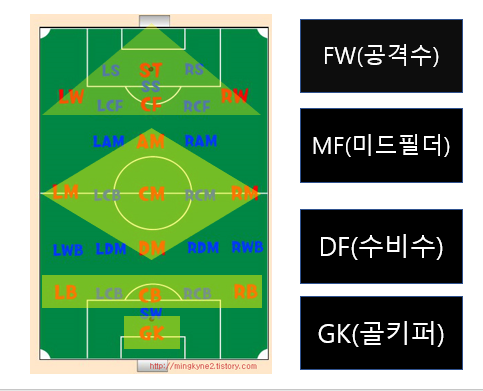

In [21]:
#디테일한 포지션을 공격수(FW), 미드필더(MF), 수비수(DF), 공격수(GK) 4가지 포지션으로 매핑한 후 'Best_Position_4' 열 생성
position_map = {'ST':'FW','CF':'FW','LW':'FW','RW':'FW','CM':'MF','CAM':'MF','CDM':'MF','LM':'MF','RM':'MF','CB':'DF','RB':'DF','LB':'DF','RWB':'DF','LWB':'DF','GK':'GK'}
data1['Best_Position_4'] = data1['Best Position'].map(position_map)
data1

Name   Value   Wage Best Position Release Clause  \
0             L. Suárez  €31.5M  €115K            ST         €64.6M   
1          K. De Bruyne    €87M  €370K           CAM          €161M   
2       Bruno Fernandes    €63M  €195K           CAM        €124.4M   
3          A. Griezmann  €50.5M  €290K            ST        €103.5M   
4              M. Acuña    €22M   €41K            LB         €46.2M   
...                 ...     ...    ...           ...            ...   
17103      19 C. Miszta    €50K   €500            GK          €120K   
17104           B. Voll    €50K   €500            GK           €83K   
17105         T. Parker    €60K   €500            GK          €149K   
17106        H. Sveijer    €50K   €500            GK           €94K   
17107       19 J. Milli    €50K   €500            GK          €109K   

       Finishing Best_Position_4  
0           92.0              FW  
1           82.0              MF  
2           77.0              MF  
3           88.0              FW  
4           66.0              DF  
...          ...             ...  
17103        5.0              GK  
17104        9.0              GK  
17105        7.0              GK  
17106        7.0              GK  
17107        6.0              GK  

[17108 rows x 7 columns]

In [22]:
#유로 없애고, 킬로(K)단위를 000으로 반환
data1['wage2']=data1['Wage'].apply(lambda x : str(x)[1:])
data1['wage3']=data1['wage2'].apply(lambda x : str(x)[0:-1]+"000" if str(x)[-1]=="K" else x)
data1

Name   Value   Wage Best Position Release Clause  \
0             L. Suárez  €31.5M  €115K            ST         €64.6M   
1          K. De Bruyne    €87M  €370K           CAM          €161M   
2       Bruno Fernandes    €63M  €195K           CAM        €124.4M   
3          A. Griezmann  €50.5M  €290K            ST        €103.5M   
4              M. Acuña    €22M   €41K            LB         €46.2M   
...                 ...     ...    ...           ...            ...   
17103      19 C. Miszta    €50K   €500            GK          €120K   
17104           B. Voll    €50K   €500            GK           €83K   
17105         T. Parker    €60K   €500            GK          €149K   
17106        H. Sveijer    €50K   €500            GK           €94K   
17107       19 J. Milli    €50K   €500            GK          €109K   

       Finishing Best_Position_4 wage2   wage3  
0           92.0              FW  115K  115000  
1           82.0              MF  370K  370000  
2           77.0              MF  195K  195000  
3           88.0              FW  290K  290000  
4           66.0              DF   41K   41000  
...          ...             ...   ...     ...  
17103        5.0              GK   500     500  
17104        9.0              GK   500     500  
17105        7.0              GK   500     500  
17106        7.0              GK   500     500  
17107        6.0              GK   500     500  

[17108 rows x 9 columns]

In [23]:
#데이터 타입
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17108 non-null  object 
 1   Value            17108 non-null  object 
 2   Wage             17108 non-null  object 
 3   Best Position    17108 non-null  object 
 4   Release Clause   15479 non-null  object 
 5   Finishing        17108 non-null  float64
 6   Best_Position_4  17108 non-null  object 
 7   wage2            17108 non-null  object 
 8   wage3            17108 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.2+ MB


In [24]:
#numeric으로 변환
data1['wage4'] = pd.to_numeric(data1['wage3'])
data1

Name   Value   Wage Best Position Release Clause  \
0             L. Suárez  €31.5M  €115K            ST         €64.6M   
1          K. De Bruyne    €87M  €370K           CAM          €161M   
2       Bruno Fernandes    €63M  €195K           CAM        €124.4M   
3          A. Griezmann  €50.5M  €290K            ST        €103.5M   
4              M. Acuña    €22M   €41K            LB         €46.2M   
...                 ...     ...    ...           ...            ...   
17103      19 C. Miszta    €50K   €500            GK          €120K   
17104           B. Voll    €50K   €500            GK           €83K   
17105         T. Parker    €60K   €500            GK          €149K   
17106        H. Sveijer    €50K   €500            GK           €94K   
17107       19 J. Milli    €50K   €500            GK          €109K   

       Finishing Best_Position_4 wage2   wage3   wage4  
0           92.0              FW  115K  115000  115000  
1           82.0              MF  370K  370000  370000  
2           77.0              MF  195K  195000  195000  
3           88.0              FW  290K  290000  290000  
4           66.0              DF   41K   41000   41000  
...          ...             ...   ...     ...     ...  
17103        5.0              GK   500     500     500  
17104        9.0              GK   500     500     500  
17105        7.0              GK   500     500     500  
17106        7.0              GK   500     500     500  
17107        6.0              GK   500     500     500  

[17108 rows x 10 columns]

In [25]:
#데이터 타입
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17108 entries, 0 to 17107
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             17108 non-null  object 
 1   Value            17108 non-null  object 
 2   Wage             17108 non-null  object 
 3   Best Position    17108 non-null  object 
 4   Release Clause   15479 non-null  object 
 5   Finishing        17108 non-null  float64
 6   Best_Position_4  17108 non-null  object 
 7   wage2            17108 non-null  object 
 8   wage3            17108 non-null  object 
 9   wage4            17108 non-null  int64  
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [26]:
#데이터 wage4의 평균
data1.groupby('Best_Position_4').wage4.mean()

Best_Position_4
DF    10102.743187
FW    11441.712963
GK     8316.375546
MF    10789.477989
Name: wage4, dtype: float64

In [27]:
#분포
pd.crosstab(data1.Best_Position_4, data1.wage4)

wage4            0       500     550     600     650     700     750     \
Best_Position_4                                                           
DF                  116     592      35      35      37      31      37   
FW                   79     297      20      13      17      22      16   
GK                   54     257      16      20      21      18      12   
MF                  131     703      30      50      38      41      48   

wage4            800     850     900     ...  240000  250000  260000  270000  \
Best_Position_4                          ...                                   
DF                   36      43      49  ...       0       0       0       0   
FW                   28      11      23  ...       1       2       0       2   
GK                   16      14      18  ...       0       1       1       0   
MF                   56      57      50  ...       1       0       1       0   

wage4            290000  300000  310000  350000  370000  560000  
Best_Position_4                                                  
DF                    0       1       0       0       0       0  
FW                    1       1       0       2       0       1  
GK                    0       0       0       0       0       0  
MF                    0       0       2       0       1       0  

[4 rows x 141 columns]

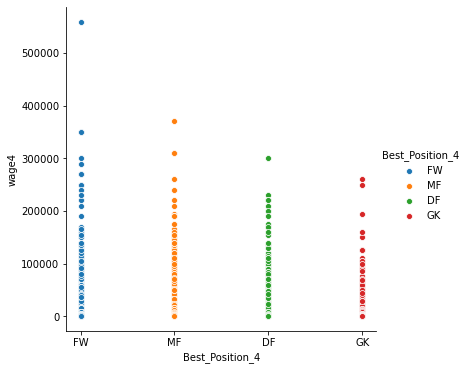

In [28]:
#pair plot그리기
sns.pairplot(data = data1, x_vars = ['Best_Position_4'], y_vars=['wage4'], hue = 'Best_Position_4', size=5)

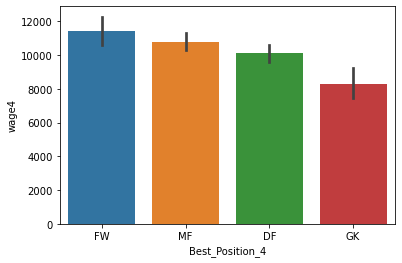

In [29]:
#bar plot 그리기
sns.barplot(x = "Best_Position_4", y  = "wage4", data = data1)

In [30]:
#공격수 주급 가장 높은 선수 
data1[data1['wage4']==560000]

Name   Value   Wage Best Position Release Clause  Finishing  \
18   L. Messi  €67.5M  €560K            RW        €138.4M       95.0   

   Best_Position_4 wage2   wage3   wage4  
18              FW  560K  560000  560000

In [31]:
#공격수 주급 가장 높은 선수 제거
data2= data1[data1.wage4 != 560000]
data2

Name   Value   Wage Best Position Release Clause  \
0             L. Suárez  €31.5M  €115K            ST         €64.6M   
1          K. De Bruyne    €87M  €370K           CAM          €161M   
2       Bruno Fernandes    €63M  €195K           CAM        €124.4M   
3          A. Griezmann  €50.5M  €290K            ST        €103.5M   
4              M. Acuña    €22M   €41K            LB         €46.2M   
...                 ...     ...    ...           ...            ...   
17103      19 C. Miszta    €50K   €500            GK          €120K   
17104           B. Voll    €50K   €500            GK           €83K   
17105         T. Parker    €60K   €500            GK          €149K   
17106        H. Sveijer    €50K   €500            GK           €94K   
17107       19 J. Milli    €50K   €500            GK          €109K   

       Finishing Best_Position_4 wage2   wage3   wage4  
0           92.0              FW  115K  115000  115000  
1           82.0              MF  370K  370000  370000  
2           77.0              MF  195K  195000  195000  
3           88.0              FW  290K  290000  290000  
4           66.0              DF   41K   41000   41000  
...          ...             ...   ...     ...     ...  
17103        5.0              GK   500     500     500  
17104        9.0              GK   500     500     500  
17105        7.0              GK   500     500     500  
17106        7.0              GK   500     500     500  
17107        6.0              GK   500     500     500  

[17107 rows x 10 columns]

In [32]:
#메시 제외 평균
data2.groupby('Best_Position_4').wage4.mean()

Best_Position_4
DF    10102.743187
FW    11272.352578
GK     8316.375546
MF    10789.477989
Name: wage4, dtype: float64

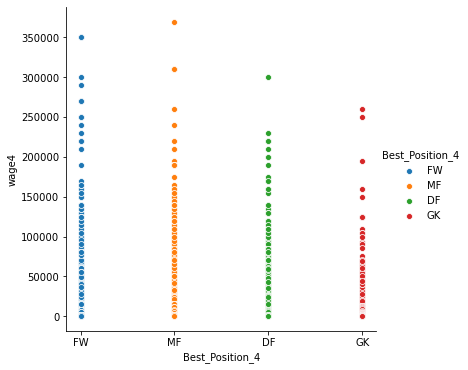

In [33]:
#공격수 max 선수 - 메시 제거 후 pair plot
sns.pairplot(data = data2, x_vars = ['Best_Position_4'], y_vars=['wage4'], hue = 'Best_Position_4', size=5)

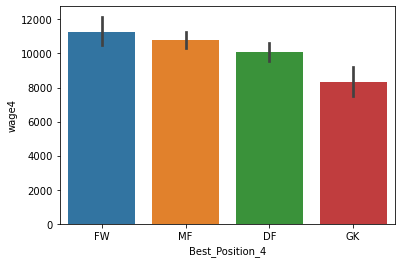

In [34]:
#메시 제외 bar plot
sns.barplot(x = "Best_Position_4", y  = "wage4", data = data2)

# 결론
1. FIFA21 게임 내의 공격수의 주급(Wage)이 가장 높다.
2. FIFA21 게임 내의 주급은 공격수, 미드필더, 수비수, 골키퍼 순으로 나타났다.
3. FIFA21 게임 내의 공격수 중 주급(Wage)가 가장 높은 메시를 제거해보았을 때도 결과는 동일하다.

# 수정사항 (혼동 방지를 위해 단순오류 제외 위에 직접 따로 수정하지 않았습니다)
1) (단순오류) 가설 2에 fin_corr이 중복되어 코딩되어있다.-> 불필요한 중복을 수정함

2) (단순오류) 가설2와 3에 첨부된 두 다른 사진이 같은 사진으로 업로드되어있다.-> 확인 및 수정 후 재업로드

3) (오류) 가설 2의 결론 2번: 19-20 시즌 프리미어리그에서 실제 선수들이 골을 넣은 횟수와 슈팅한 횟수 모두 FIFA21 게임의 선수별 골 결정력에 반영이 된다. 이 부분에서 비율을 비교하고 시각화한 것이기 때문에 분모,분자가 모두 반영이 된다고 보기는 힘들것이다. -> 기존에는 (실제 선수들이 골을 넣은 횟수)/(슈팅한 횟수)=유효슈팅횟수인데 이를 골결정력과 비교하기 위해서 분모와 분자를 각각 게임 스탯값과 선형적임을 보이고 둘 다 반영이 된다고 결론을 내린 것이었다. 하지만 전체 선수들의 데이터를 비교했을 때는 분모 분자와 그 비인 유효슈팅횟수는 선형적이지만 게임의 '골 결정력' 스탯은 각 선수별로 비교되는 것이기 때문에 각 선수들의 실제 골 넣은 횟수와 슈팅 횟수가 모두 골 결정력에 반영된다고 보기는 힘들다. 따라서 각각이 아닌 유효슈팅횟수라는 비율을 골결정력과 비교하는게 맞다고 결론지었다.

4) (질문) 가설 3에서 wage 칼럼만 사용하였는데 다른 칼럼을 불러온 이유? -> 원래 wage만이 아니라 선수의 경제적 가치가 반영된 이적료나 몸값 등도 다루어 볼 생각에 추출을 하였지만 분석에는 사용하지 않아서이다.

5) (제안) 가설 3 주급을 비교할 때 평균으로만 나타내었는데 다른 방식으로 시각화해보는 것이 어떠한가? -> 바이올린 플랏으로 그려보았지만 시각적으로 유의미하게 느껴지지 않았고 비교가 거의 불가능해서 중앙값을 뽑아서 그려보았다. 선수들의 몸값의 편차를 고려하였을 때 평균값보다 중앙값이 더 유의미할 것 같다는 생각이 들었고 실제로 중앙값을 뽑아내어보니 차이가 뚜렷하였다.

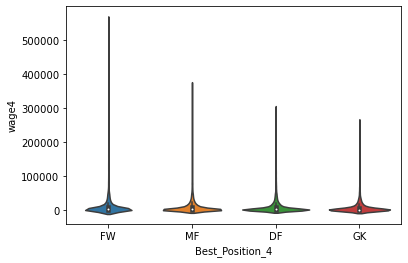

In [82]:
#주급을 바이올린 plot으로도 그려보기
sns.violinplot(x = "Best_Position_4", y  = "wage4", data = data1)

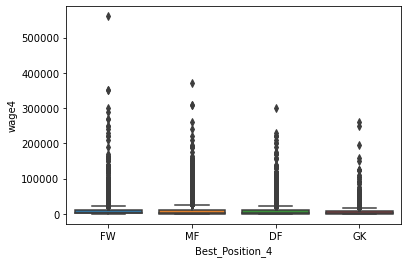

In [99]:
sns.boxplot(x = "Best_Position_4", y  = "wage4", data = data1)

In [87]:
#주급 중앙값
np.median(data1[data1.Best_Position_4=='FW'].wage4),np.median(data1[data1.Best_Position_4=='MF'].wage4),np.median(data1[data1.Best_Position_4=='DF'].wage4),np.median(data1[data1.Best_Position_4=='GK'].wage4)

(4000.0, 4000.0, 3000.0, 2000.0)

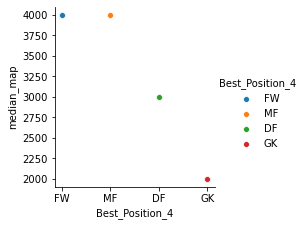

In [100]:
median_map = {'FW':4000,'MF':4000,'DF':3000, 'GK':2000}
data1['median_map'] = data1['Best_Position_4'].map(median_map)
sns.pairplot(data = data1, x_vars = ['Best_Position_4'], y_vars=['median_map'], hue = 'Best_Position_4', size=3) #0포함

공격수와 미드필더는 4000유로로 같지만, 수비수는 3000, 골키퍼는 2000 유로였다.
평균 주급은 큰 차이가 없어보이지만 선수들의 포지션별 주급 중앙값은 큰 차이를 보이는 것을 알 수 있다.

# 출처
0. 데이터 Kaggle -Fifa, UCL data
1. https://blog.naver.com/ron27/221441352273 (손흥민 실사 사진)
2. http://www.slist.kr/news/articleView.html?idxno=184433 (손흥민 피파 사진)